Notebook: Template para Projetos de IA e Machine Learning
Autor: [Seu Nome]
Data: [Data do Projeto]

**1. Introdução**

Descreva o objetivo do projeto, os problemas que ele aborda e os resultados esperados.

## Objetivo
Este projeto visa desenvolver um modelo de [descrição do modelo] para resolver [problema].

## Metodologia
1. Análise exploratória dos dados.
2. Preparação dos dados.
3. Treinamento e avaliação de modelos.
4. Otimização e interpretação dos resultados.

## Resultado esperado
Obter um modelo com métricas satisfatórias para [finalidade].

#### 1. Configuração Inicial

Importação das bibliotecas necessárias e configuração do ambiente.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.datasets import fetch_openml

import warnings

# Configuração para evitar warnings
warnings.filterwarnings('ignore')

# Configurações de exibição
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#### 2. Carregamento e Visualização dos Dados

In [2]:

credit = fetch_openml(name='credit-g', version=1)

df_credit = pd.DataFrame(credit.data)

df_credit['target'] = credit.target

print('\nPrimeiras linhas do dataset:')
display(df_credit.head())

print('\nÚltimas linhas do dataset:')
display(df_credit.tail())

print('\nInformações sobre as variáveis do dataset:')
display(df_credit.info())

print('\nEstatística Descritiva:')
display(df_credit.describe())


Primeiras linhas do dataset:


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad



Últimas linhas do dataset:


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,4,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,4,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,4,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,4,no known property,23,none,for free,1,skilled,1,yes,yes,bad
999,0<=X<200,45,critical/other existing credit,used car,4576,100<=X<500,unemployed,3,male single,none,4,car,27,none,own,1,skilled,1,none,yes,good



Informações sobre as variáveis do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-nu

None


Estatística Descritiva:


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.85,35.55,1.41,1.16
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


In [3]:
print(f'Número de registros duplicas: {df_credit.duplicated().sum()}')

Número de registros duplicas: 0


#### 4. Análise Exploratória de Dados (EDA)

##### 4.1 Entendo o conteúdo das variáveis categóricas

In [4]:
for col in df_credit.select_dtypes(include='category'):
    print(f'\nColuna: {col}')
    df_count = pd.DataFrame(df_credit[col].value_counts(dropna=False).reset_index())
    df_perc = pd.DataFrame(df_credit[col].value_counts(dropna=False, normalize=True).reset_index())

    df_count = pd.merge(df_count,df_perc, on=col, how='left')
    display(df_count)


Coluna: checking_status


,checking_status,count,proportion
0,no checking,394,0.39
1,<0,274,0.27
2,0<=X<200,269,0.27
3,>=200,63,0.06



Coluna: credit_history


,credit_history,count,proportion
0,existing paid,530,0.53
1,critical/other existing credit,293,0.29
2,delayed previously,88,0.09
3,all paid,49,0.05
4,no credits/all paid,40,0.04



Coluna: purpose


,purpose,count,proportion
0,radio/tv,280,0.28
1,new car,234,0.23
2,furniture/equipment,181,0.18
3,used car,103,0.10
4,business,97,0.10
5,education,50,0.05
6,repairs,22,0.02
7,domestic appliance,12,0.01
8,other,12,0.01
9,retraining,9,0.01



Coluna: savings_status


,savings_status,count,proportion
0,<100,603,0.60
1,no known savings,183,0.18
2,100<=X<500,103,0.10
3,500<=X<1000,63,0.06
4,>=1000,48,0.05



Coluna: employment


,employment,count,proportion
0,1<=X<4,339,0.34
1,>=7,253,0.25
2,4<=X<7,174,0.17
3,<1,172,0.17
4,unemployed,62,0.06



Coluna: personal_status


,personal_status,count,proportion
0,male single,548,0.55
1,female div/dep/mar,310,0.31
2,male mar/wid,92,0.09
3,male div/sep,50,0.05



Coluna: other_parties


,other_parties,count,proportion
0,none,907,0.91
1,guarantor,52,0.05
2,co applicant,41,0.04



Coluna: property_magnitude


,property_magnitude,count,proportion
0,car,332,0.33
1,real estate,282,0.28
2,life insurance,232,0.23
3,no known property,154,0.15



Coluna: other_payment_plans


,other_payment_plans,count,proportion
0,none,814,0.81
1,bank,139,0.14
2,stores,47,0.05



Coluna: housing


,housing,count,proportion
0,own,713,0.71
1,rent,179,0.18
2,for free,108,0.11



Coluna: job


,job,count,proportion
0,skilled,630,0.63
1,unskilled resident,200,0.20
2,high qualif/self emp/mgmt,148,0.15
3,unemp/unskilled non res,22,0.02



Coluna: own_telephone


,own_telephone,count,proportion
0,none,596,0.60
1,yes,404,0.40



Coluna: foreign_worker


,foreign_worker,count,proportion
0,yes,963,0.96
1,no,37,0.04



Coluna: target


,target,count,proportion
0,good,700,0.70
1,bad,300,0.30


##### 4.2 Visualização dos dados

Valores nulos por coluna:


checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
target                    0
dtype: int64

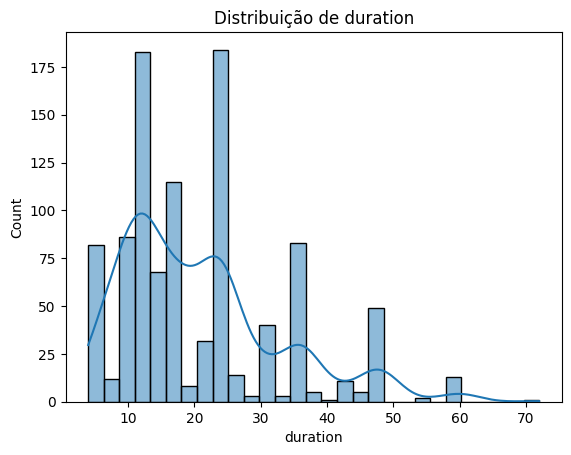

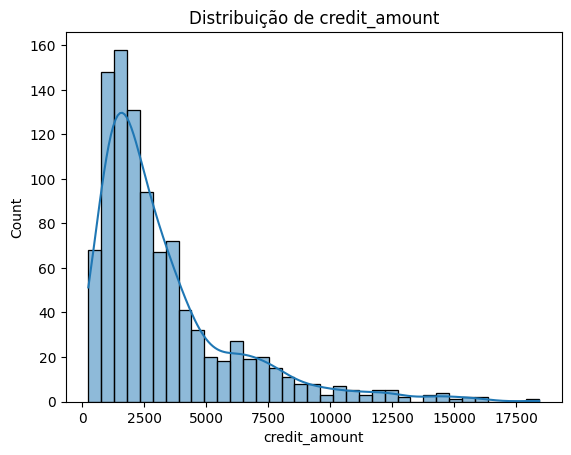

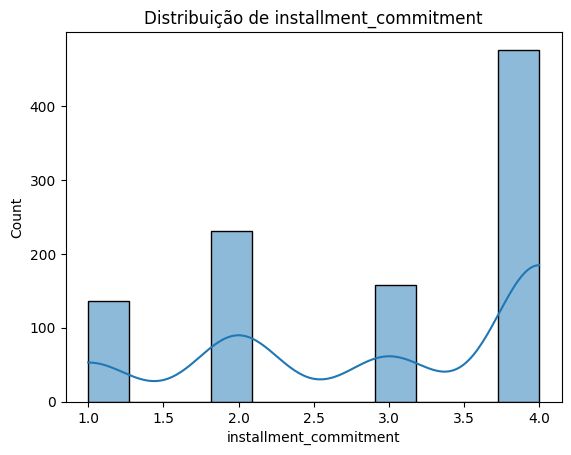

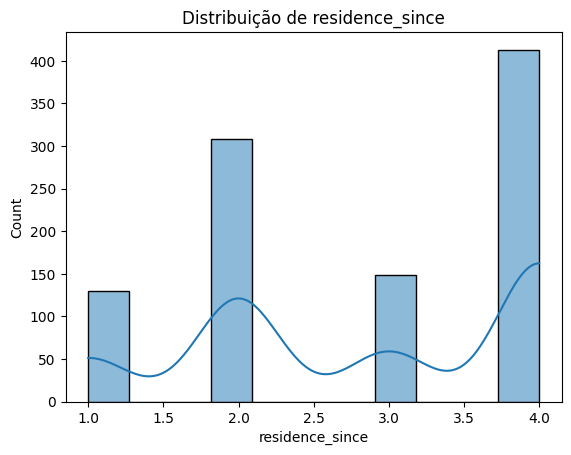

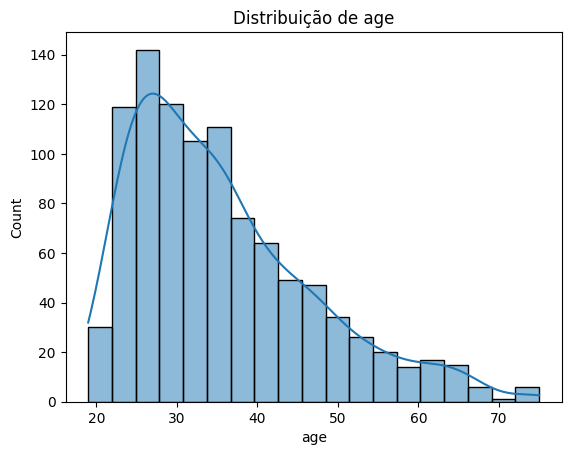

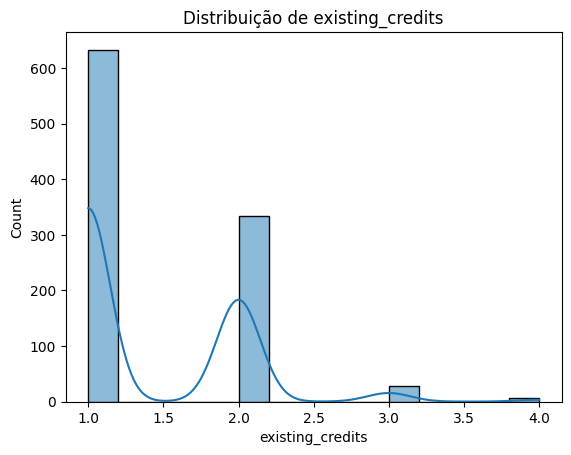

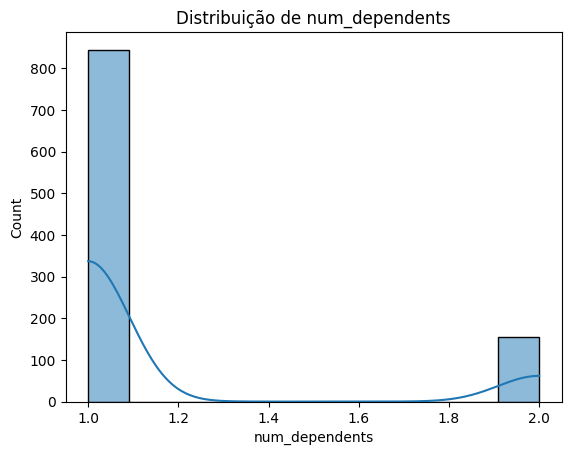

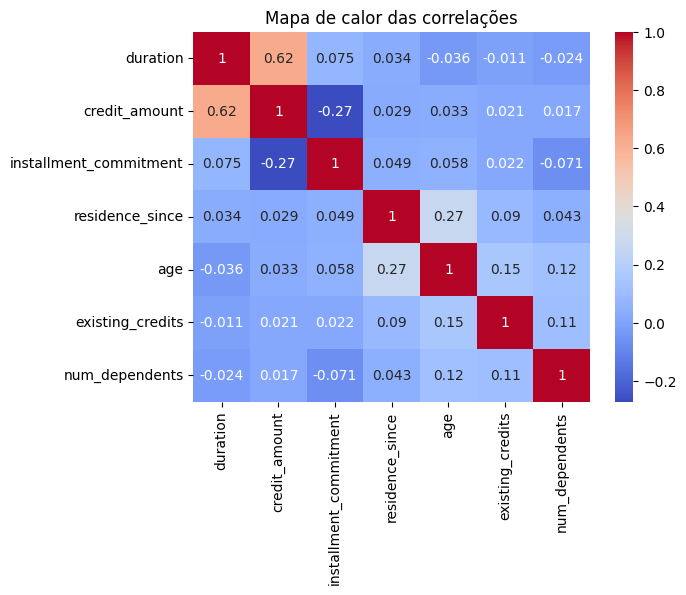

In [5]:
# Visualização de valores nulos
print("Valores nulos por coluna:")
display(df_credit.isnull().sum())

# # Visualização de distribuições e relações
import seaborn as sns

# # Distribuições
for column in df_credit.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(df_credit[column], kde=True)
    plt.title(f'Distribuição de {column}')
    plt.show()

# Correlações

sns.heatmap(df_credit.select_dtypes(include=['float', 'int']).corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor das correlações")
plt.show()


#### 5. Pré-processamento dos Dados

In [6]:
scaler = StandardScaler()

X = pd.get_dummies(credit.data)
y = LabelEncoder().fit_transform(credit.target)

# Split dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar os dados
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Dimensões dos dados de treino: {X_train.shape}")
print(f"Distribuição das classes: \n{pd.Series(y_train).value_counts(normalize=True)}")


Dimensões dos dados de treino: (700, 61)
Distribuição das classes: 
1   0.70
0   0.30
Name: proportion, dtype: float64


#### 6. Treinamento do Modelo

In [9]:
models = {}

def train_logistic_regression():
    """Treina e avalia o modelo de Regressão Logística"""
    print("\nTreinando Regressão Logística...")
    
    # Grid Search para encontrar os melhores parâmetros
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'class_weight': [None, 'balanced']
    }
    
    lr = LogisticRegression(random_state=42, max_iter=1000)
    grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    
    models['logistic'] = grid_search.best_estimator_
    print(f"Melhores parâmetros: {grid_search.best_params_}")
    evaluate_model('logistic')
    
def train_random_forest():
    """Treina e avalia o modelo Random Forest"""
    print("\nTreinando Random Forest...")
    
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'class_weight': [None, 'balanced']
    }
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    
    models['random_forest'] = grid_search.best_estimator_
    print(f"Melhores parâmetros: {grid_search.best_params_}")
    evaluate_model('random_forest')
    
def train_xgboost():
    """Treina e avalia o modelo XGBoost"""
    print("\nTreinando XGBoost...")
    
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)]
    }
    
    xgb = XGBClassifier(random_state=42)
    # grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc')
    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    
    models['xgboost'] = grid_search.best_estimator_
    print(f"Melhores parâmetros: {grid_search.best_params_}")
    evaluate_model('xgboost')

def evaluate_model(model_name):
    """Avalia o modelo especificado"""
    model = models[model_name]
    
    # Fazer previsões
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    print(f"\nResultados para {model_name}:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"\nROC AUC Score: {roc_auc_score(y_test, y_prob):.3f}")
    
    # Plotar matriz de confusão
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    
def plot_feature_importance(model_name):
    """Plota a importância das features para modelos que suportam"""
    if model_name not in ['random_forest', 'xgboost']:
        print(f"Importância de features não disponível para {model_name}")
        return
        
    model = models[model_name]
    feature_names = X.columns
    
    if model_name == 'random_forest':
        importances = model.feature_importances_
    else:  # xgboost
        importances = model.feature_importances_
        
    # Ordenar importâncias
    indices = np.argsort(importances)[::-1]

    # display(len(feature_names))
    # display(len(indices))
    # display(len(importances))

    # display(X_train)
    # display(X_test)
    # display(X)
    # display(y)

    # display(feature_names)
    # display(indices)

    # Plotar
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importances ({model_name})')
    plt.bar(range(10), importances[indices[:10]])
    # plt.xticks(len(feature_names), feature_names, rotation=45, ha='right')
    plt.xticks(range(10), feature_names[indices[:10]], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
    
def get_risk_score(model_name, X_new):
    """Calcula o score de risco para novos dados"""
    if model_name not in models:
        raise ValueError(f"Modelo {model_name} não encontrado")
        
    # Preparar dados
    X_new = scaler.transform(X_new)
    
    # Calcular probabilidade
    risk_prob = models[model_name].predict_proba(X_new)[:, 1]
    
    # Converter para score de 0-100
    risk_score = risk_prob * 100
    
    return risk_score


#### 7. Avaliação do Modelo


Treinando Regressão Logística...
Melhores parâmetros: {'C': 0.01, 'class_weight': None}

Resultados para logistic:

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.41      0.51        90
           1       0.78      0.91      0.84       210

    accuracy                           0.76       300
   macro avg       0.73      0.66      0.68       300
weighted avg       0.75      0.76      0.74       300


ROC AUC Score: 0.784


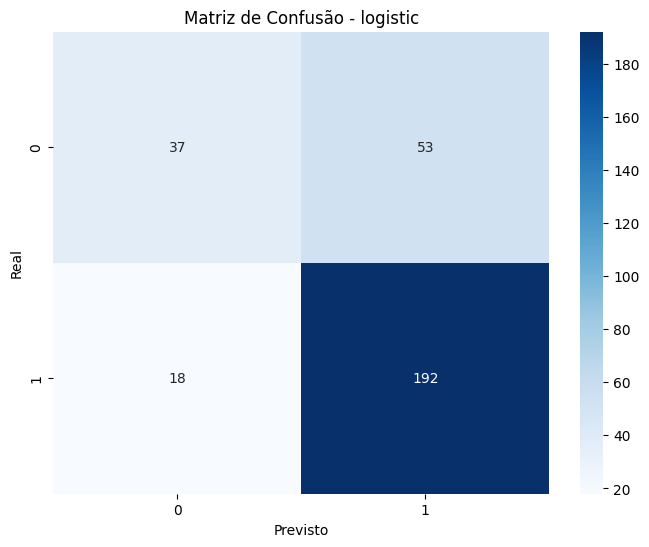


Treinando Random Forest...
Melhores parâmetros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Resultados para random_forest:

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.41      0.48        90
           1       0.78      0.88      0.82       210

    accuracy                           0.74       300
   macro avg       0.68      0.64      0.65       300
weighted avg       0.72      0.74      0.72       300


ROC AUC Score: 0.785


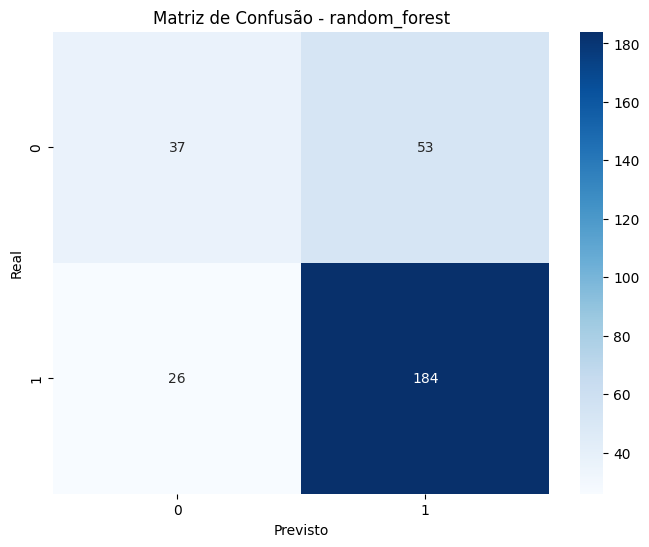


Treinando XGBoost...
Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1}

Resultados para xgboost:

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.70      1.00      0.82       210

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300


ROC AUC Score: 0.765


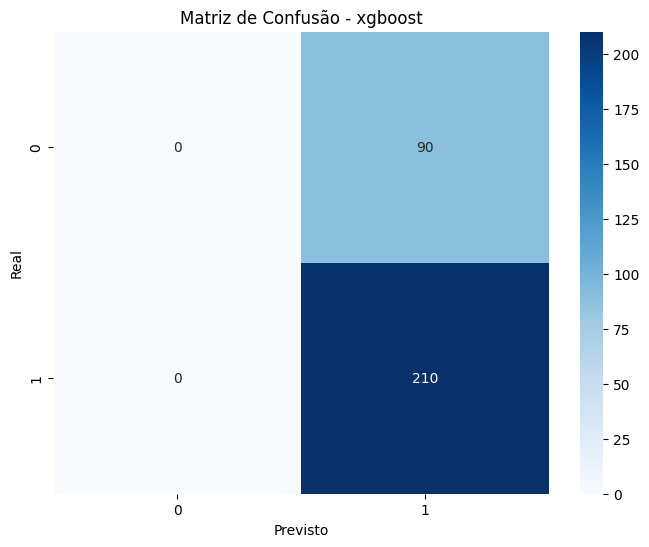

In [10]:
train_logistic_regression()
train_random_forest()
train_xgboost()

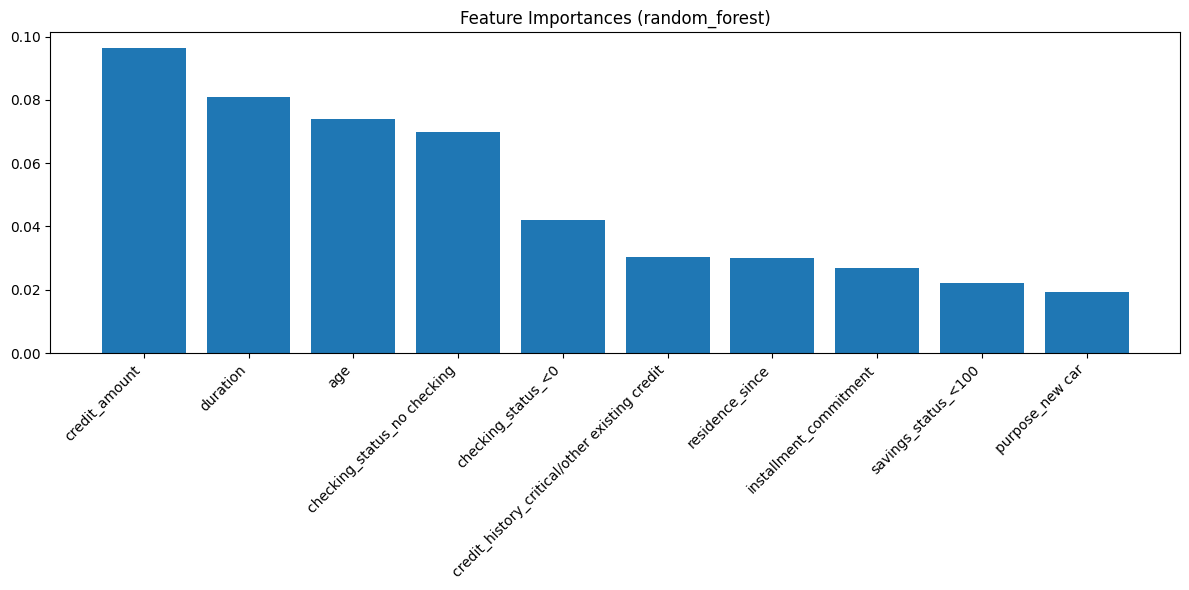

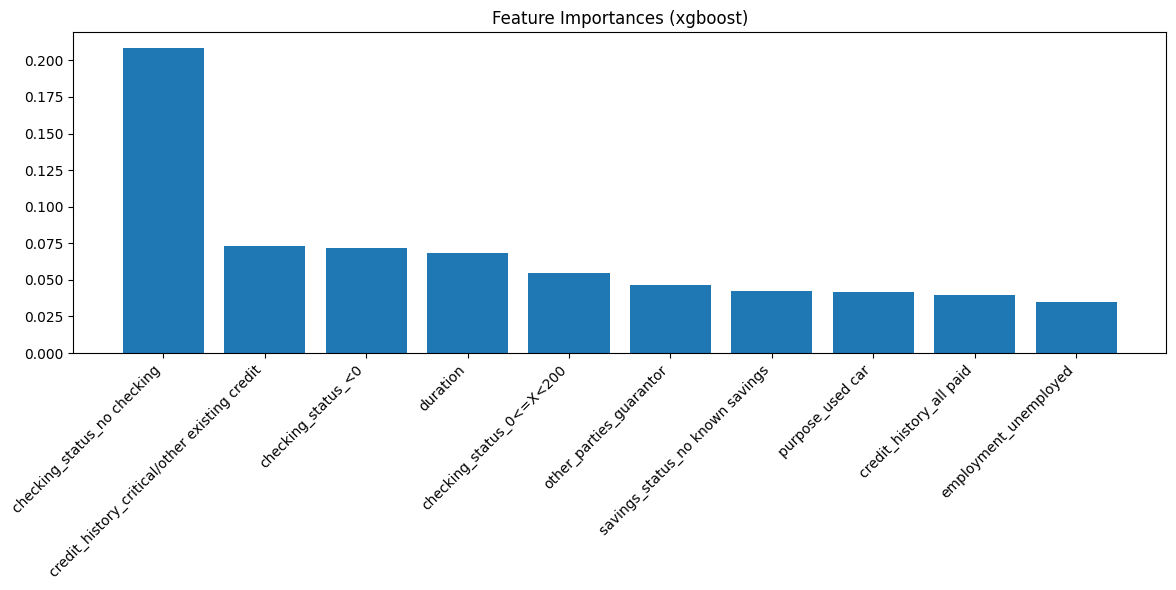


Score de risco para novo cliente: 73.35


In [11]:
plot_feature_importance('random_forest')
plot_feature_importance('xgboost')

# Exemplo de como calcular score para novos dados
# (substitua isso com seus próprios dados)
new_data = pd.DataFrame([X_test[178]])  # Exemplo usando primeira linha do teste
risk_score = get_risk_score('xgboost', new_data)
print(f"\nScore de risco para novo cliente: {risk_score[0]:.2f}")

#### 8. Otimização e Ajustes    

In [12]:
# # Busca por parâmetros ótimos com GridSearchCV (exemplo)
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
#                            param_grid=param_grid, 
#                            cv=5, 
#                            scoring='accuracy')

# grid_search.fit(X_train, y_train)

# print("Melhores parâmetros:")
# print(grid_search.best_params_)

# # Avaliação com o melhor modelo
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)

# print("\nRelatório de classificação com o melhor modelo:")
# print(classification_report(y_test, y_pred_best))


#### 9. Salvando o Modelo e Resultados

In [13]:
# import joblib

# # Salvando o modelo
# model_path = 'best_model.pkl'
# joblib.dump(best_model, model_path)
# print(f"Modelo salvo em: {model_path}")

# # Salvando resultados
# results_path = 'results.csv'
# pd.DataFrame({'Real': y_test, 'Predito': y_pred_best}).to_csv(results_path, index=False)
# print(f"Resultados salvos em: {results_path}")


#### 10. Conclusão e Próximos Passos

- Resuma os resultados obtidos.
- Proponha melhorias ou próximos passos para aprimorar o modelo.
